### Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')

### Reading csv file

In [2]:
df_bikes = pd.read_csv("day.csv")

### Data checks

In [3]:
# Displaying first 5 records of the dataset
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Let's see the shape of data
df_bikes.shape

(730, 16)

In [5]:
#Checking for the data type of each column
df_bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
#Checking for missing values
df_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### Observation:
* There are no missing values in the data. So, we can procede without doing anything related to missing values

In [7]:
# Summary of all numerical columns in the dataset
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing unnecessary columns for modeling

In [8]:
# We can see that 'instant' is an index column. so, dropping it
df_bikes.drop(['instant'], axis=1, inplace=True)
df_bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Dropping the 'dteday' column. There are no much variables we can derive from it.
#Initial data it self having the most of the required variable that we can create using date.
df_bikes.drop(['dteday'], axis=1, inplace=True)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Dropping the columns 'casual' and 'registered'. As per the data characteristics cnt = casual + registered
#Keeping those values won't add advantage to our model.
df_bikes.drop(['casual', 'registered'], axis=1, inplace=True)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Analysis using visualization

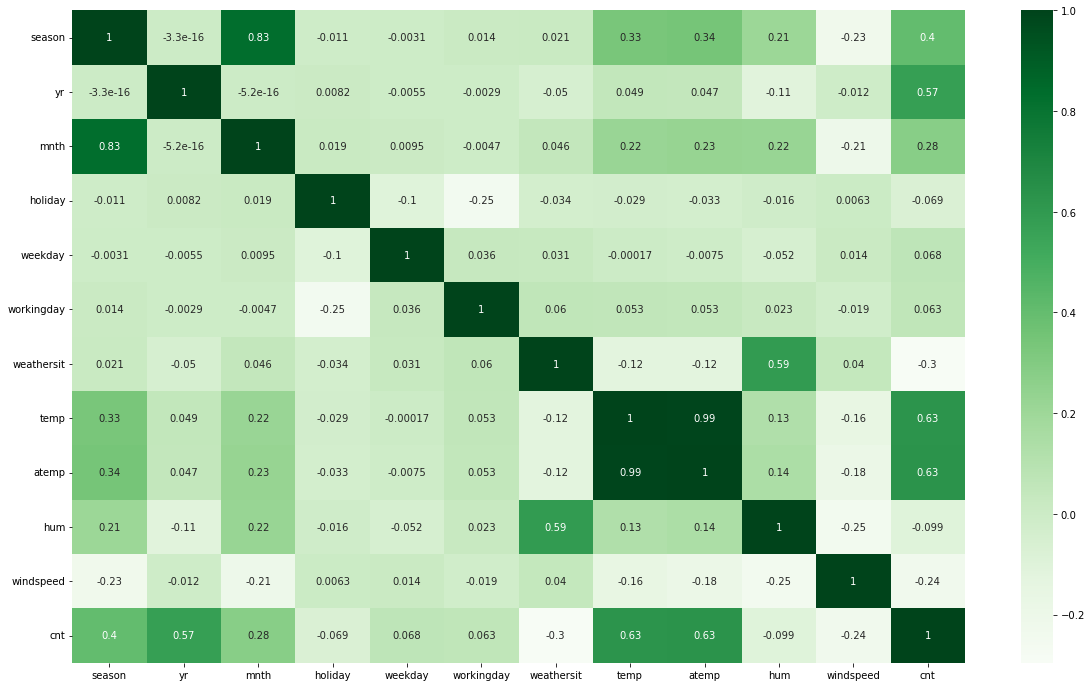

In [11]:
# Heatmap to check correlation between variables
plt.figure(figsize=(20, 12))
sns.heatmap(df_bikes.corr(), annot = True, cmap='Greens')
plt.show()

###### Observation:
* From above plot we can observe that there is high correlation between `temp` and `atemp` and as per the definitions both are similar kind of variables. So, droping one from those improves the performance of the model.

##### Drop one more column

In [12]:
df_bikes.drop('atemp', axis=1, inplace=True)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


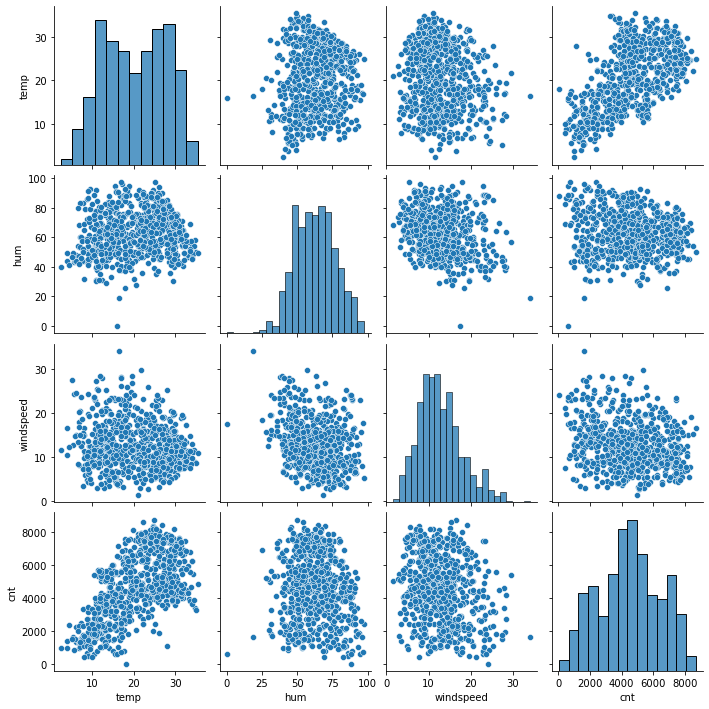

In [13]:
# plotting Pair plot to undersand the spread of values
sns.pairplot(df_bikes, vars=["temp", "hum", "windspeed", "cnt"])
plt.show()

##### Observations:
1. From above pair plot we can observer that there is a positive correlation between `temp` and `cnt` variables
2. `hum` and `windspeed` doesn't show any linear relationship. Sees it doesn't have any impact on `cnt`. 

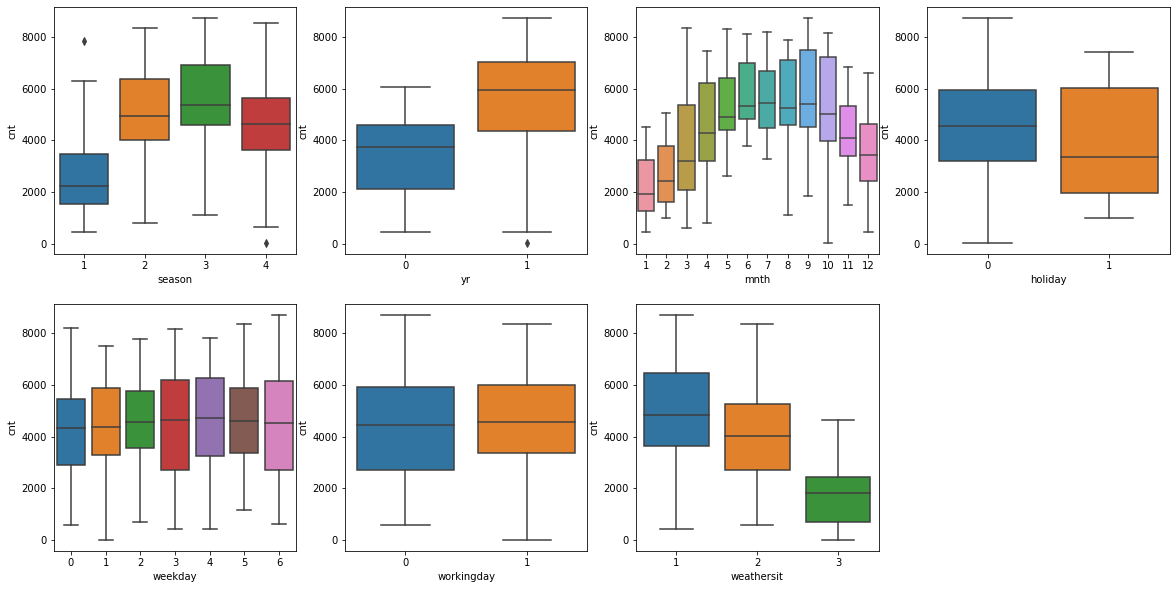

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bikes)
plt.subplot(2, 4, 2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikes)
plt.subplot(2, 4, 3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bikes)
plt.subplot(2, 4, 4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bikes)
plt.subplot(2, 4, 5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikes)
plt.subplot(2, 4, 6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikes)
plt.subplot(2, 4, 7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikes)
plt.show()

##### Observations:
1. Season was shown impact on bike rentals. More rentals observed during 3(fall) season and then in 2(summer) season.
2. We can observer high number of rentals in second year(2019) compared to first year(2018).
3. Bike rentals are high from 5th(May) month to 10th(October) month. May be those months are comes under fall and summer seasons.
4. Bike rentals are more on non-holidays.
5. Weather condition is impacting bike rentals. When weathre condition is in normal state(Clear, Few clouds, Partly cloudy, Partly cloudy days) people are renting the bikes more.
6. Weekdays doesn't shown much impact on rentals.
7. Working day or holiday doesn’t seem to have much effect on bike rentals.
8. According to above plots there are no much outliers in the data.

### Preparing data for modeling

##### Create dummies for the categorical variables

In [15]:
# We can see that Season and weathersit are having same kind of lables(1,2,3,4). 
# With the following simple one line of code it can automatically handles that kind of structure instead of converting labels to categorical variables. 
df_bikes= pd.get_dummies(data=df_bikes, columns=['mnth', 'season','weekday','weathersit'], drop_first= True)

In [16]:
df_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2', 'season_3',
       'season_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

##### Splitting into train and test

In [17]:
df_train, df_test = train_test_split(df_bikes, train_size =0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


##### Scaling the training data

In [18]:
scaler = MinMaxScaler()

#create a list of numeric vars
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,1,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,1,0,1,0


##### heatmap to check the correlation between variables

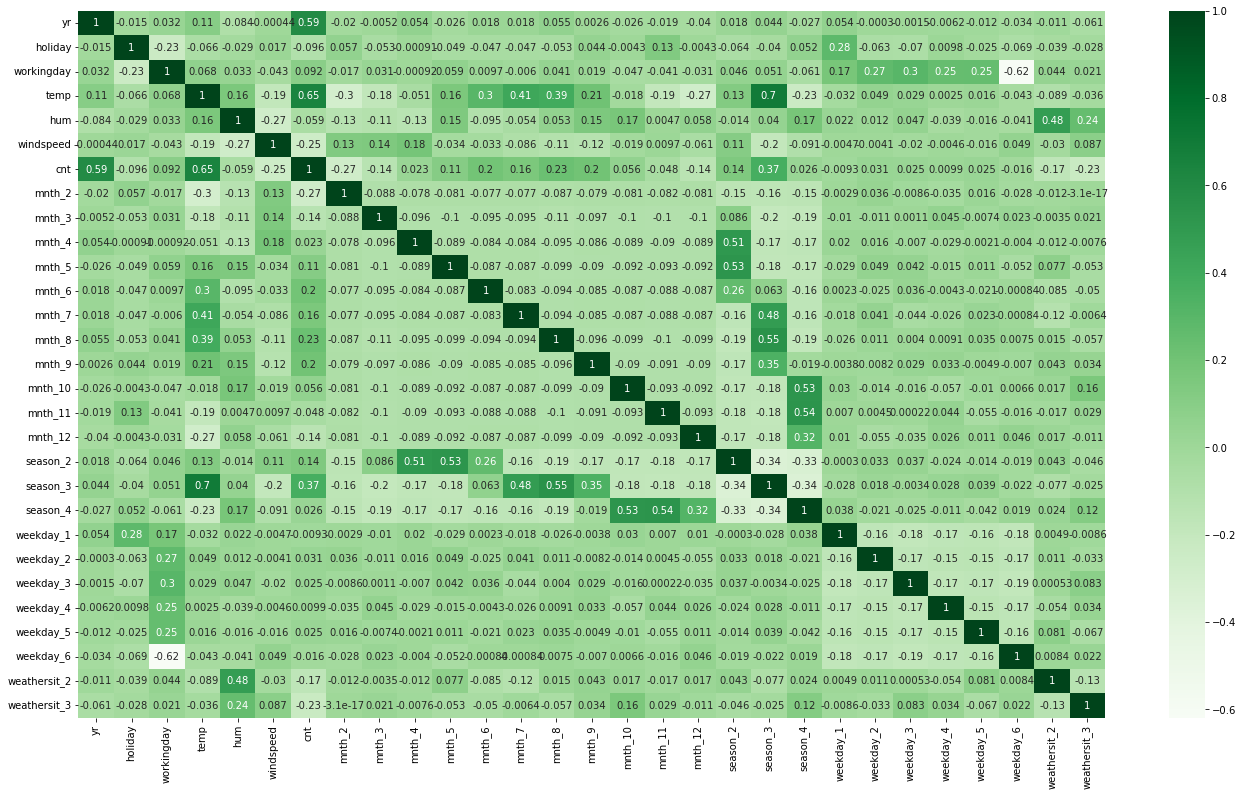

In [19]:
plt.figure(figsize = (23, 13))
sns.heatmap(df_train.corr(), annot = True, cmap ='Greens')
plt.show()

###### Observations:
* We can observe that `temp`, `year`, `season_3` and few months seems to have good positive corelation with count of rentals(`cnt`).

##### Dividing independent and dependent variables

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

In [21]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_2,mnth_3,mnth_4,mnth_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### RFE
Running RFE to automatically elemenate few varibles. Instead of doing it manually

In [22]:
# Running RFE with the output number of the variable equal to 17
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 17)# running RFE
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 7),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [24]:
# Features which are selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_3',
       'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'season_2', 'season_3',
       'season_4', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [25]:
# Features which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

##### Model 1

In [26]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [27]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [28]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [29]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          5.55e-190
Time:                        22:00:29   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1944      0.029      6.697   

In [30]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,54.92
13,season_3,6.49
4,temp,3.84
12,season_2,2.83
14,season_4,2.36
5,hum,1.95
3,workingday,1.89
15,weekday_6,1.79
9,mnth_8,1.68
16,weathersit_2,1.57


###### Observations:
* 'mnth_5' is having high P-values and low VIF.
So, let's remove it and run the model again

##### Model 2

In [31]:
# Dropping const, mnth_5
X_train_fd = X_train_rfe.drop(["const","mnth_5"], axis = 1)

In [32]:
#Add constant and run model again
X_train_fd = sm.add_constant(X_train_fd)
lm_fd = sm.OLS(y_train, X_train_fd).fit()
print(lm_fd.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.46e-190
Time:                        22:00:29   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1892      0.029      6.549   

In [33]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_fd.columns
vif['VIF'] = [variance_inflation_factor(X_train_fd.values, i) for i in range(X_train_fd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,54.22
12,season_3,6.29
4,temp,3.72
11,season_2,2.66
13,season_4,2.33
5,hum,1.91
3,workingday,1.89
14,weekday_6,1.79
8,mnth_8,1.68
15,weathersit_2,1.57


###### Observations:
* 'mnth_3' is having high P-values and low VIF.
So, let's remove it and run the model again

##### Model 3

In [34]:
# Dropping const, mnth_3
X_train_sd = X_train_fd.drop(["const","mnth_3"], axis = 1)

In [35]:
#Add constant and run model again
X_train_sd = sm.add_constant(X_train_sd)
lm_sd = sm.OLS(y_train, X_train_sd).fit()
print(lm_sd.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          5.17e-191
Time:                        22:00:29   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

In [36]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_sd.columns
vif['VIF'] = [variance_inflation_factor(X_train_sd.values, i) for i in range(X_train_sd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.48
11,season_3,6.04
4,temp,3.71
10,season_2,2.61
12,season_4,2.16
5,hum,1.91
3,workingday,1.88
13,weekday_6,1.79
7,mnth_8,1.68
14,weathersit_2,1.57


###### Observations:
* 'season_3' is having high P-value and high VIF.
So, let's remove it and run the model again

##### Model 4

In [37]:
# Dropping const, season_3
X_train_td = X_train_sd.drop(["const","season_3"], axis = 1)

In [38]:
#Add constant and run model again
X_train_td = sm.add_constant(X_train_td)
lm_td = sm.OLS(y_train, X_train_td).fit()
print(lm_td.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          8.70e-192
Time:                        22:00:29   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

In [39]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_td.columns
vif['VIF'] = [variance_inflation_factor(X_train_td.values, i) for i in range(X_train_td.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
12,weekday_6,1.79
11,season_4,1.71
4,temp,1.59
13,weathersit_2,1.56
9,mnth_10,1.49
7,mnth_8,1.46
10,season_2,1.38


###### Observations:
* From above model statistics we can observe that the P-value for most of the variables is around zero and less that 0.05(significant level).
* Also, VIF is also low and in same praportion for all variables. 

__So, we are good to go to residual analysis on this model__

### Residual analysis on training data

##### Test Normality of the Error Terms

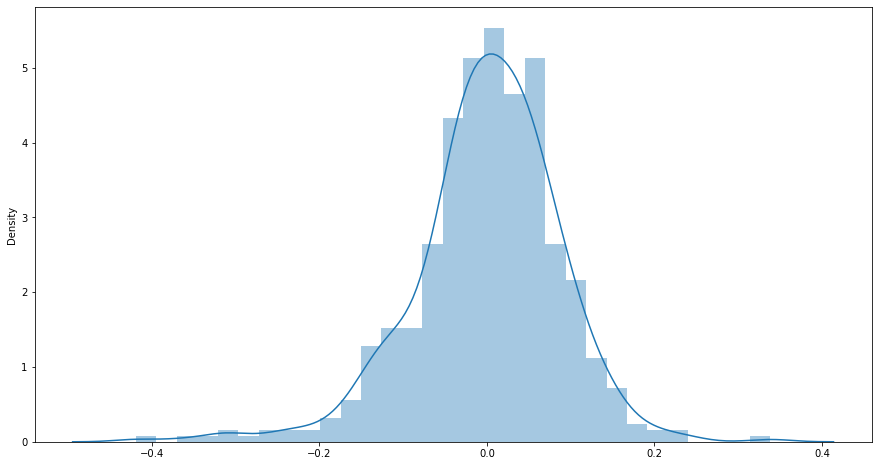

In [40]:
y_train_pred = lm_td.predict(X_train_td)

res_td = y_train - y_train_pred

plt.figure(figsize = (15, 8))
sns.distplot(res_td)
plt.show()

###### Observations:
* We can notice that the Error terms are normally distributed.

##### Test for Homoscedasticity

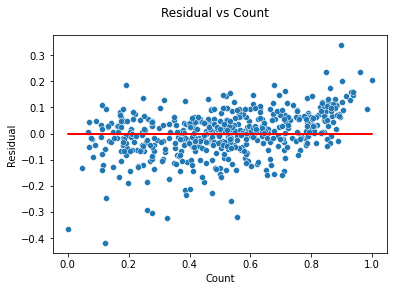

In [41]:
# plotting residual vs count scatter plot
sns.scatterplot(y_train, res_td)
plt.plot(y_train, [0]*len(y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

###### Observations:
* We can observe that there is a constant deviation from the zero line, and there are no visible patterns in the error terms. So, this model fit looks good.

##### Test for Auto-correlation assumtion

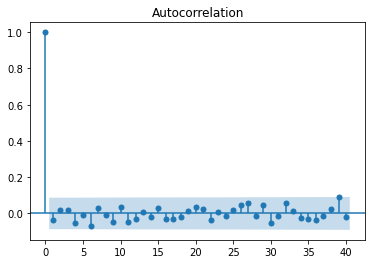

In [42]:
acf = smt.graphics.plot_acf(res_td, lags=40 , alpha=0.05)
acf.show()

###### Observations:
* We can see in the above plot, there are no much error components crossing the confidence interval. So, we can say that there is no pattern in the error and hence No auto-correlation of errors.

### Making predicitons

In [43]:
#Let's run and see the previous variable that we created for all numerical variables
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [44]:
#Transform all numerical variables using previously build scaling method
df_test[num_vars] = scaler.transform(df_test[num_vars])

##### Separate dependent and independent variables of test data

In [45]:
y_test = df_test.pop('cnt')
X_test = df_test

##### Predict the values

In [46]:
#Check columns in last model
X_train_td.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_8', 'mnth_9', 'mnth_10', 'season_2', 'season_4', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
#Create test data as which is similar to train data used for the model
X_test_similar = X_test[X_train_td.columns[1:]]

#Add constant to the data
X_test_td = sm.add_constant(X_test_similar)

#Predict using test data
y_pred_td = lm_td.predict(X_test_td)

#### Check R-square on test data

In [48]:
r2_score(y_test, y_pred_td)

0.8149002944843474

###### Observations:
* We can observe a good correlation value based on R-square value on test set
* R-square values of train and test doesn't shown much variation.

##### Plotting y_test and y_pred_fsd to understand the spread

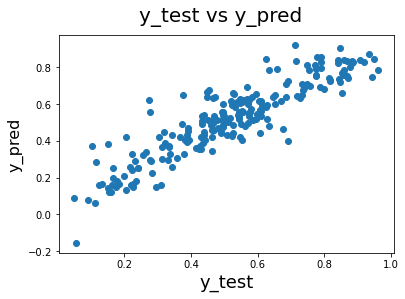

In [49]:
# Plotting y_test and y_pred_fsd to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_td)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

###### Observations:
* We can observe a good linear trend between `y_test` and `y_pred`

##### Actual vs Predicted

Text(0, 0.5, 'Views')

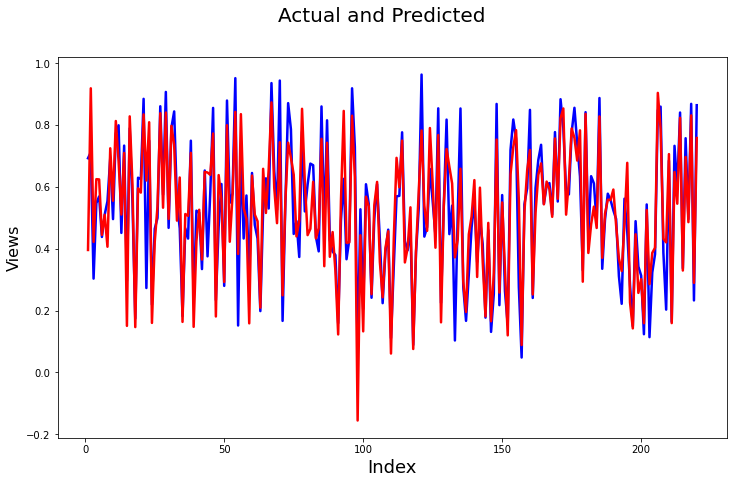

In [50]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize=(12,7))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_td, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 

###### Observations:
* Threr is good overlap between actual and predicted.

### Print the statistics of final model again for conclusion

In [51]:
print(lm_td.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          8.70e-192
Time:                        22:00:30   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_td)

0.8149002944843474

In [53]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))
print('Test R-Score: ' ,r2_score(y_test, y_pred_td))

Train R-Score:  0.8475442609382655
Test R-Score:  0.8149002944843474


### Conclusion: 
1. R square and Adjusted R square are close within 85% variance. So model is good.
2. F -Stats= 196.6 and Prob(F-Stats) =8.70e-192, this explains that overall model is good fit
3. P value of all the coeff is close to zero.

__Model is:__

__count =__ (0.2292 * yr) - (0.0557 * holiday) + (0.0442 * workingday) + (0.5309 * temp) - (0.1708 * hum) - (0.1858 * windspeed) + (0.0557 * mnth_8) + (0.1252 * mnth_9) + (0.0385 * mnth_10) + (0.1049 * season_2) + (0.1349 * season_4) + (0.0527 * weekday_6) - (0.0568 * weathersit_2) - (0.2470 * weathersit_3)